In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

In [5]:
k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y, c):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod, c

def f(t,pos):
  x_mod,y_mod, c = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dudx = np.real(np.sum(-K**2*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dvdy= np.real(np.sum(-L**2*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dc = -c * (dudx + dvdy)
  return [dx,dy,dc]
  

In [6]:
f(30,[2,1,0])

[-0.09800847296437343, -0.19690000779677344, 0.0]

In [7]:
#Single trajectory
x,y = np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100)
X,Y = np.meshgrid(x,y)
c = 1

t_span = (0,5000)
y0 = [2,1, c]
sol = solve_ivp(f,t_span,y0)

path = sol.y

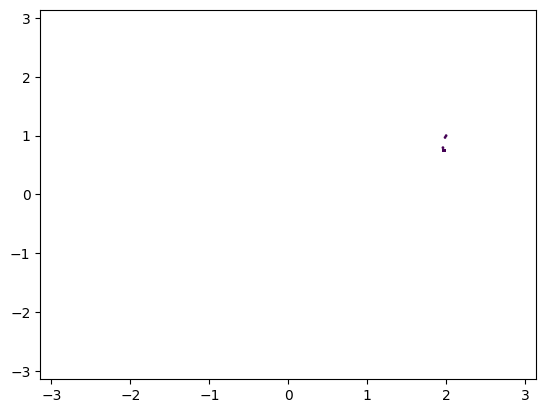

In [10]:
plt.scatter(path[0],path[1], s=1, c=path[2], cmap='viridis')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.show()

In [27]:
t_span = (0,2000)
#t_eval = np.linspace(t_span[0], t_span[1], num=500)
hyh
#Randomly select initial points
np.random.seed(42)
num_points = 2000
x_coords = np.random.uniform(-np.pi, np.pi, num_points)
y_coords = np.random.uniform(-np.pi, np.pi, num_points)
initial_conditions = np.column_stack((x_coords, y_coords))

solutions = []

for y0 in initial_conditions:
  sol = solve_ivp(f,t_span,y0)
  solutions.append(sol)

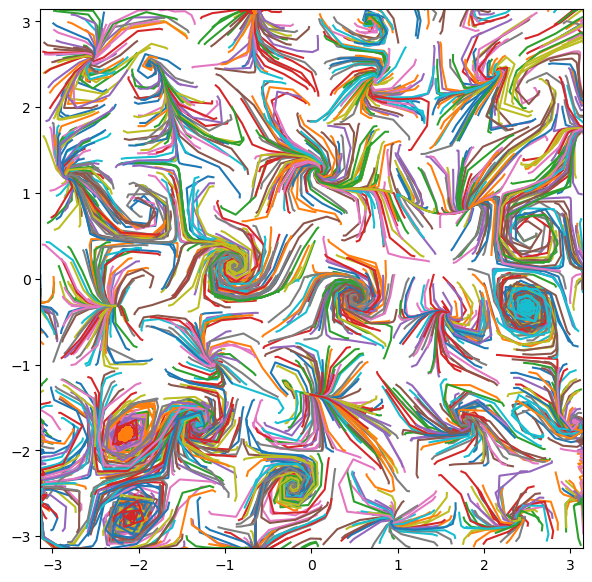

In [30]:
#Plot the trajectories

plt.figure(figsize=(7, 7))
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# Save the trajectories
import pickle
file = open('particle_trajectories_2000', 'wb')
pickle.dump(solutions, file)

for sol in solutions:
  plt.plot(sol.y[0],sol.y[1])



plt.show()
